In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Loading the first 5 rows of the dataset
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
#Checking number of rows and columns
df.shape

(23486, 11)

In [5]:
#Checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [6]:
#checking duplicate values
df.duplicated().sum()

0

In [7]:
#checking for null values
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [8]:
#dropping the null values
df=df.dropna()

In [9]:
#confirming null values are dropped
df.shape

(19662, 11)

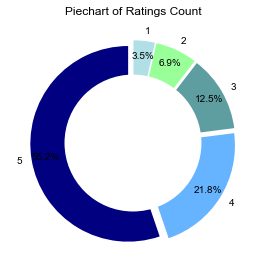

In [10]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['5', '4','3','2','1']
sizes = df['Rating'].value_counts()
#colors
colors = ['navy','#66b3ff','#5F9EA0','#99ff99','#B0E0E6']
#explsion
explode = (0.05,0.05,0.05,0.05, 0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#Adjusts chart size
sns.set(rc={'figure.figsize':(16, 8)})
plt.title('Piechart of Ratings Count') 
plt.tight_layout()
plt.show()

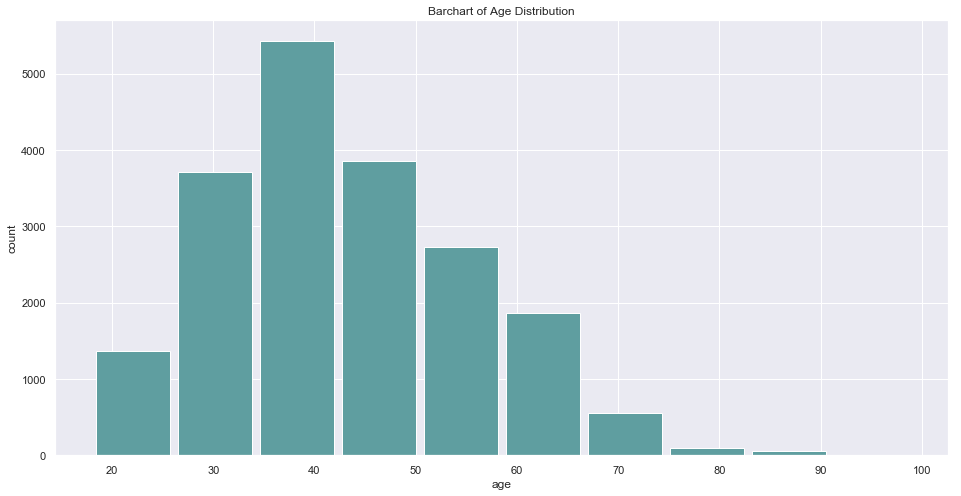

In [11]:
import matplotlib.pyplot as plt
# Pie chart
# labels = df['Age'].value_counts().values
sizes = df['Age']
bins  = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]



 

plt.hist(sizes,  histtype='bar', rwidth=0.9, color='#5F9EA0')

plt.xlabel('age')
plt.ylabel('count')
plt.title('Barchart of Age Distribution') 
plt.show()

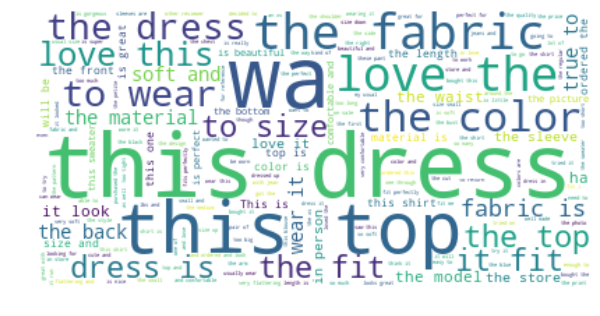

In [12]:
#Renaming data
reviews = df
# Let's build a word cloud looking at the 'Review Text' text
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Wordcloud function's input needs to be a single string of text.
# Here I'm concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str = reviews['Review Text'].str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

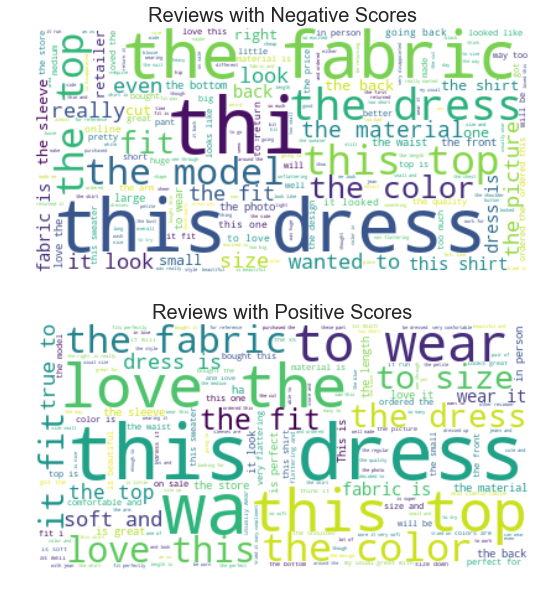

In [13]:
#Renaming dataset
reviews=df
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or 5) Reviews.
negative_reviews = reviews[reviews['Rating'].
isin([1,2]) ]
positive_reviews = reviews[reviews['Rating'].
isin([4,5]) ]
# Transform to single string
negative_reviews_str = negative_reviews['Review Text'].str.cat()
positive_reviews_str = positive_reviews['Review Text'].str.cat()
# Create wordclouds
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

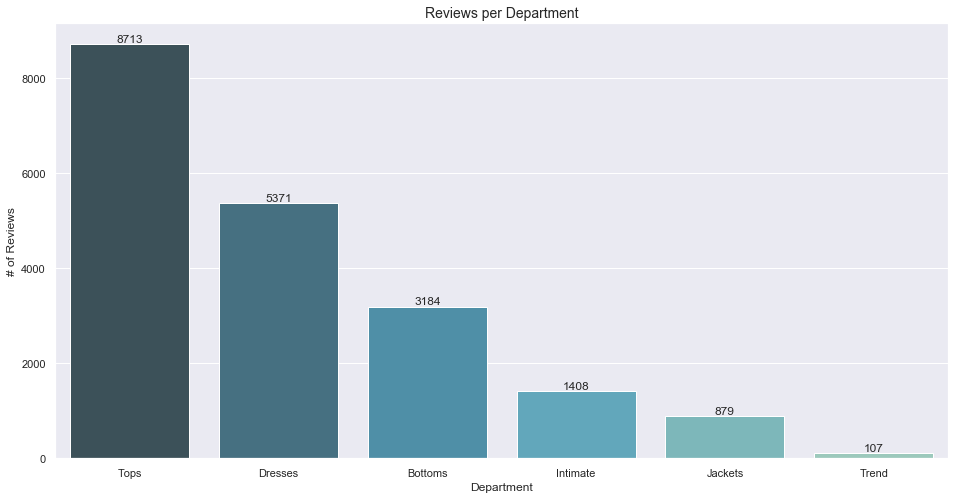

In [14]:
# department name vs reviews
ax=sns.countplot(x='Department Name', data=df,palette="GnBu_d", order = df['Department Name'].value_counts().index)
ax.set_title("Reviews per Department", fontsize=14)
ax.set_ylabel("# of Reviews", fontsize=12)
ax.set_xlabel("Department", fontsize=12)
x=df['Department Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

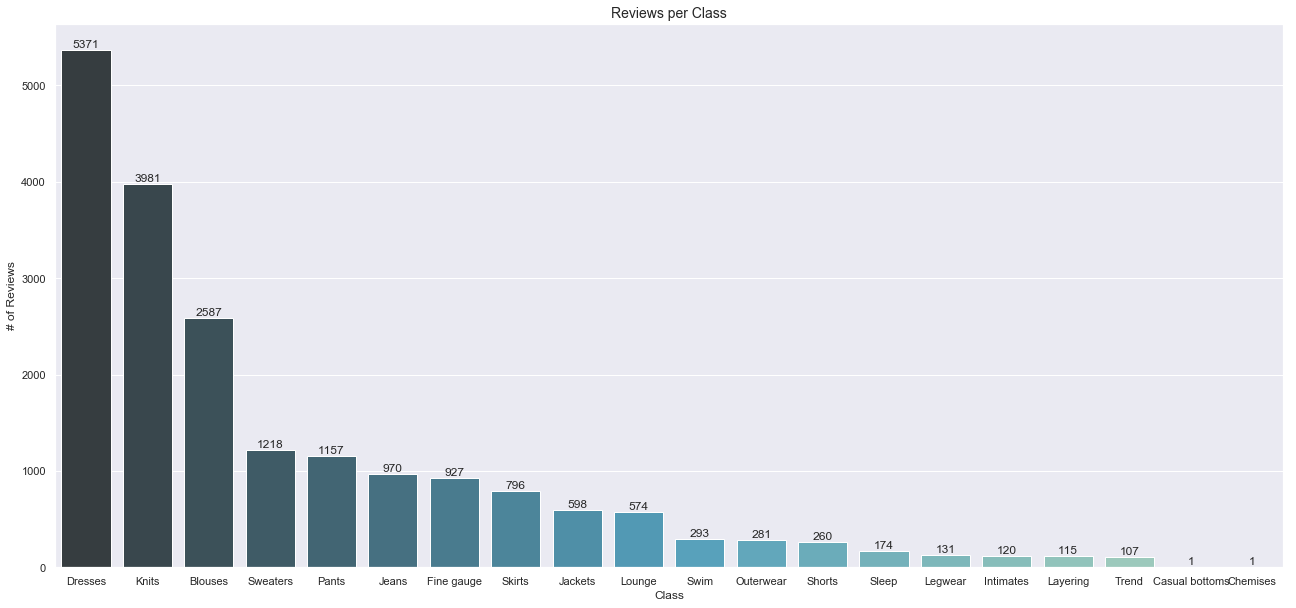

In [15]:
plt.figure(figsize= (22,10  ))
ax=sns.countplot(x='Class Name', data=df,palette="GnBu_d", order = df['Class Name'].value_counts().index)
ax.set_title("Reviews per Class", fontsize=14)
ax.set_ylabel("# of Reviews", fontsize=12)
ax.set_xlabel("Class", fontsize=12)
x=df['Class Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

[Text(0, 0.5, 'rating count'),
 Text(0.5, 0, ' Department name'),
 Text(0.5, 1.0, 'Ratings per department')]

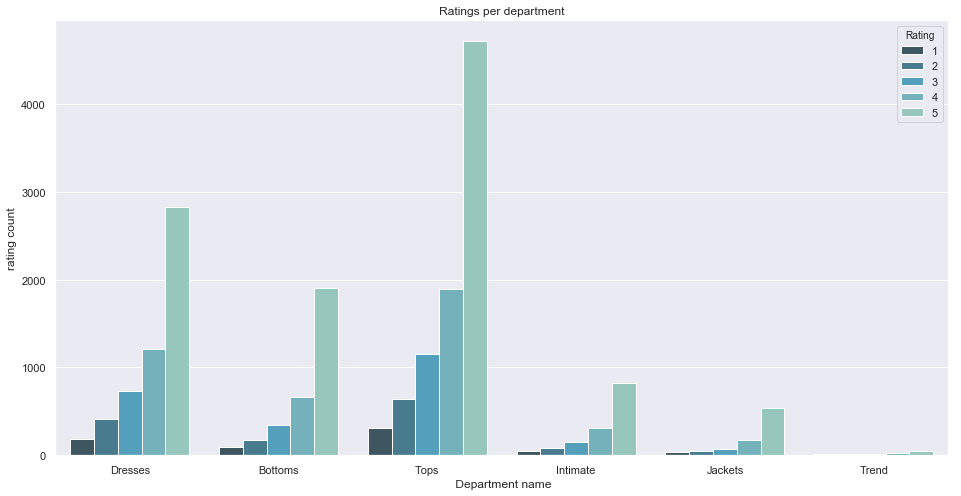

In [16]:
# investigating the relationship between department name and ratings
ratings= sns.countplot('Department Name',palette="GnBu_d", hue = 'Rating', data = df)
ratings.set(title = "Ratings per department",
            ylabel =  'rating count',
        xlabel = " Department name")

In [17]:
# 1,2 = negative
# 3 = neutral
# 4,5 = positive

df1 = df[['Review Text','Rating']]

df1['Rating'] = df1['Rating'].replace(1,'negative')
df1['Rating'] = df1['Rating'].replace(2,'negative')
df1['Rating'] = df1['Rating'].replace(3,'neutral')
df1['Rating'] = df1['Rating'].replace(4,'positive')
df1['Rating'] = df1['Rating'].replace(5,'positive')

df1.head(20)

C:\DalbirData\New folder\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\DalbirData\New folder\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\DalbirData\New folder\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

,Review Text,Rating
2,I had such high hopes for this dress and reall...,neutral
3,"I love, love, love this jumpsuit. it's fun, fl...",positive
4,This shirt is very flattering to all due to th...,positive
5,"I love tracy reese dresses, but this one is no...",negative
6,I aded this in my basket at hte last mintue to...,positive
7,"I ordered this in carbon for store pick up, an...",positive
8,I love this dress. i usually get an xs but it ...,positive
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",positive
10,Dress runs small esp where the zipper area run...,neutral
12,More and more i find myself reliant on the rev...,positive


In [18]:
df1=df1[df1['Rating'] !='neutral']
df1.head(20)

,Review Text,Rating
3,"I love, love, love this jumpsuit. it's fun, fl...",positive
4,This shirt is very flattering to all due to th...,positive
5,"I love tracy reese dresses, but this one is no...",negative
6,I aded this in my basket at hte last mintue to...,positive
7,"I ordered this in carbon for store pick up, an...",positive
8,I love this dress. i usually get an xs but it ...,positive
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",positive
12,More and more i find myself reliant on the rev...,positive
13,Bought the black xs to go under the larkspur m...,positive
15,I took these out of the package and wanted the...,positive


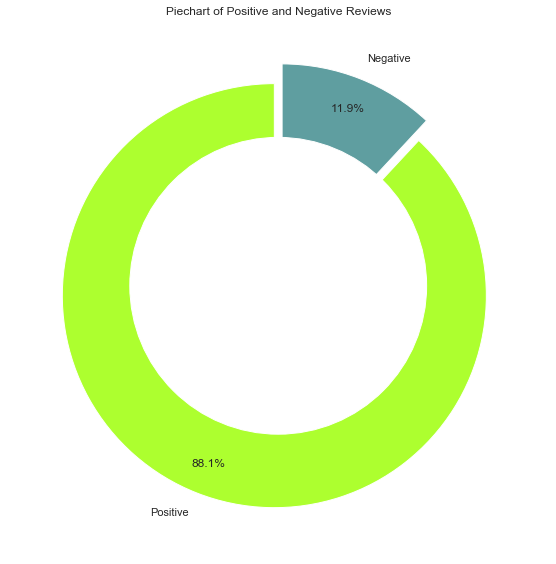

In [19]:
# Let’s see how the overall sentiment is using the sentiment we generated.


import matplotlib.pyplot as plt
# Pie chart
labels = ['Positive','Negative' ]
sizes = df1['Rating'].value_counts()
#colors
colors = ['#ADFF2F','#5F9EA0']
#explsion
explode = (0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#Adjusts chart size
sns.set(rc={'figure.figsize':(16, 8)})
plt.title('Piechart of Positive and Negative Reviews') 
plt.tight_layout()
plt.show()

In [20]:
# Import necessary libraries
#We start by loading the libraries necessary for this script:
import requests
import matplotlib.pyplot as plt
import tensorflow as tf

# Import libraries
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import re # relgular expressions
import string

In [21]:
#Importing nltk for text processing
import nltk
nltk.download("popular")

df1['Review Text'] = df1['Review Text'].astype('str') #changing the data type from object to string.

letters_only = re.sub("[^a-zA-z0-9\s]"," ", str(df1['Review Text']))  #Search for all non-letters  Replace all non-letters with spaces

# Lower casing and removing punctuations
df1['Review Text'] = df1['Review Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df1['Review Text'] = df1['Review Text'].str.replace('[^\w\s\_]','') # 'w' will match a character or digit equivalent to [^a-zA-z0-9\s]
                                                                    # 's' matches a single whitespace character 
# Lemmatization
#Lemmatisation (or lemmatization) in linguistics is the process of grouping together the inflected forms of a word
#so they can be analysed as a single item e.g word.lemmatize('ate')>>'eat' base form
df1['Review Text'] = df1['Review Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# Removal of stop words
import nltk
from nltk.corpus import stopwords #stop words are words which are filtered out before processing of natural language data.
                                   # Stop words are generally the most common words in a language'''
set(stopwords.words('english'))
    
stop = stopwords.words('english')
df1['Review Text'] = df1['Review Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df1['Review Text'].head(5)

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to C:\Users\D &
[nltk_data]    |     J\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to C:\Users\D &
[nltk_data]    |     J\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to C:\Users\D &
[nltk_data]    |     J\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to C:\Users\D &
[nltk_data]    |     J\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to C:\Users\D &
[nltk_data]    |     J\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to C:\Users\D &
[

3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
5    love tracy reese dress one petite 5 foot tall ...
6    aded basket hte last mintue see would look lik...
7    ordered carbon store pick ton stuff always try...
Name: Review Text, dtype: object

In [22]:
# Create a new data frame "reviews" to perform exploratory data analysis upon that
reviews = df1

In [23]:
# Here I'm concatenating all Review Text into a single string.
reviews_str = reviews['Review Text'].str.cat()

In [24]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4,5) Reviews.
negative_reviews = reviews[reviews['Rating']!='positive']
positive_reviews = reviews[reviews['Rating']=='positive']
# Transform to single string
negative_reviews_str = negative_reviews['Review Text'].str.cat()
positive_reviews_str = positive_reviews['Review Text'].str.cat()

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [26]:
# Next, we am dropping the 'Neutral' sentiments as our goal was to only differentiate positive and negative tweets.
# After that, we filtered the review texts so only valid texts and words remain.
# Then, we defined the number of max features as 2000 and used the
# Tokenizer to vectorize and convert text into Sequences so the Network can deal with it as input."""

#If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.
max_features = 2000 

tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(reviews['Review Text'].values)
X = tokenizer.texts_to_sequences(reviews['Review Text'].values)
X = pad_sequences(X)

In [27]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
#
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

W0510 23:41:30.592173  9320 deprecation_wrapper.py:119] From C:\DalbirData\New folder\lib\site-packages\keras\backend\tensorflow_backend.py:63: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0510 23:41:31.075385  9320 deprecation_wrapper.py:119] From C:\DalbirData\New folder\lib\site-packages\keras\backend\tensorflow_backend.py:488: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0510 23:41:31.151403  9320 deprecation_wrapper.py:119] From C:\DalbirData\New folder\lib\site-packages\keras\backend\tensorflow_backend.py:3626: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0510 23:41:31.258786  9320 deprecation.py:506] From C:\DalbirData\New folder\lib\site-packages\keras\backend\tensorflow_backend.py:2990: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rat

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 60, 128)           256000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 60, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
Y = pd.get_dummies(reviews['Rating']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 1)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(12898, 60) (12898, 2)
(4300, 60) (4300, 2)


In [29]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 7, batch_size=batch_size, verbose = 2)

W0510 23:41:32.616378  9320 deprecation.py:323] From C:\DalbirData\New folder\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0510 23:41:33.504398  9320 deprecation_wrapper.py:119] From C:\DalbirData\New folder\lib\site-packages\keras\backend\tensorflow_backend.py:949: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0510 23:41:33.513371  9320 deprecation.py:506] From C:\DalbirData\New folder\lib\site-packages\keras\backend\tensorflow_backend.py:671: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/7
 - 38s - loss: 0.2499 - acc: 0.9023
Epoch 2/7
 - 40s - loss: 0.1534 - acc: 0.9395
Epoch 3/7
 - 38s - loss: 0.1334 - acc: 0.9494
Epoch 4/7
 - 35s - loss: 0.1135 - acc: 0.9588
Epoch 5/7
 - 35s - loss: 0.0979 - acc: 0.9657
Epoch 6/7
 - 33s - loss: 0.0841 - acc: 0.9689
Epoch 7/7
 - 33s - loss: 0.0770 - acc: 0.9719


In [30]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

score: 0.24
acc: 0.92


In [31]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("pos_acc", pos_correct/pos_cnt*100, "%")
print("neg_acc", neg_correct/neg_cnt*100, "%")

pos_acc 94.89329268292683 %
neg_acc 66.48936170212765 %
